# Centrality comparison for Computer Security data
The data can be found at, https://chiarasabatti.su.domains/data.html

## Cleaning and preparing data

In [1]:
# Import libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#from scipy.optimize import curve_fit
#from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [3]:
# read csv file and check
df=pd.read_csv('CN.csv')
df.head()

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1


In [4]:
# group the number of connections to each computer,date wise,
# choose only relavant columns, which are date, l_ipn and f
df_rel=df.groupby(['date','l_ipn'],as_index=False)['f'].count()
df_rel.head()

,date,l_ipn,f
0,2006-07-01,0,35
1,2006-07-01,1,19
2,2006-07-01,2,15
3,2006-07-01,3,9
4,2006-07-01,4,11


In [5]:
# make the list of dictionaries that contain date for each node, date wise
lst_dic=[]
for dt in df_rel['date'].unique():
    df2=df_rel[df_rel['date']==dt][['l_ipn','f']]
    dic=df2.set_index('l_ipn').to_dict()['f']
    #mx=np.max(get_e(dc))
    lst_dic.append(dic)
# printing few first and last iterm in the list
# note that some dictionaries are with missing keys
print(lst_dic[0], lst_dic[-1])

{0: 35, 1: 19, 2: 15, 3: 9, 4: 11, 5: 12, 6: 11, 7: 32, 8: 39, 9: 37} {0: 38, 2: 62, 4: 19, 7: 6, 8: 84, 9: 3}


In [6]:
# inserting missing keys with zero values
allkeys = frozenset().union(*lst_dic)
for i in lst_dic:
    for j in allkeys:
        if j not in i:
            i[j]=0
# note that keys are not in order
print(lst_dic[0], lst_dic[-1])

{0: 35, 1: 19, 2: 15, 3: 9, 4: 11, 5: 12, 6: 11, 7: 32, 8: 39, 9: 37} {0: 38, 2: 62, 4: 19, 7: 6, 8: 84, 9: 3, 1: 0, 3: 0, 5: 0, 6: 0}


In [7]:
# order the keys
f_lst=[]
for dic in lst_dic:
    f_lst.append(dict(sorted(dic.items())))
print(f_lst[0], f_lst[-1])

{0: 35, 1: 19, 2: 15, 3: 9, 4: 11, 5: 12, 6: 11, 7: 32, 8: 39, 9: 37} {0: 38, 1: 0, 2: 62, 3: 0, 4: 19, 5: 0, 6: 0, 7: 6, 8: 84, 9: 3}


In [8]:
# convert this to data frame and check
pd.DataFrame(f_lst).head()

,0,1,2,3,4,5,6,7,8,9
0,35,19,15,9,11,12,11,32,39,37
1,34,37,14,10,8,18,9,7,6,2
2,38,48,22,13,10,28,16,42,29,40
3,38,43,18,12,11,19,17,24,44,3
4,42,39,22,10,13,15,12,20,45,64


In [9]:
# insert days column in the dataframe
df_days=pd.DataFrame(f_lst)
days=['day '+str(i) for i in range(1,93)]
df_days.insert(0, 'day', days)
df_days.head()

,day,0,1,2,3,4,5,6,7,8,9
0,day 1,35,19,15,9,11,12,11,32,39,37
1,day 2,34,37,14,10,8,18,9,7,6,2
2,day 3,38,48,22,13,10,28,16,42,29,40
3,day 4,38,43,18,12,11,19,17,24,44,3
4,day 5,42,39,22,10,13,15,12,20,45,64


In [10]:
# finally add mean column
df_days['mean'] = df_days.mean(numeric_only=None,axis=1)
df_days.head()

,day,0,1,2,3,4,5,6,7,8,9,mean
0,day 1,35,19,15,9,11,12,11,32,39,37,22.0
1,day 2,34,37,14,10,8,18,9,7,6,2,14.5
2,day 3,38,48,22,13,10,28,16,42,29,40,28.6
3,day 4,38,43,18,12,11,19,17,24,44,3,22.9
4,day 5,42,39,22,10,13,15,12,20,45,64,28.2


## Analysis

### Time series for the nodes

Text(0.5, 0.98, 'TIme series for nodes (left to right)')

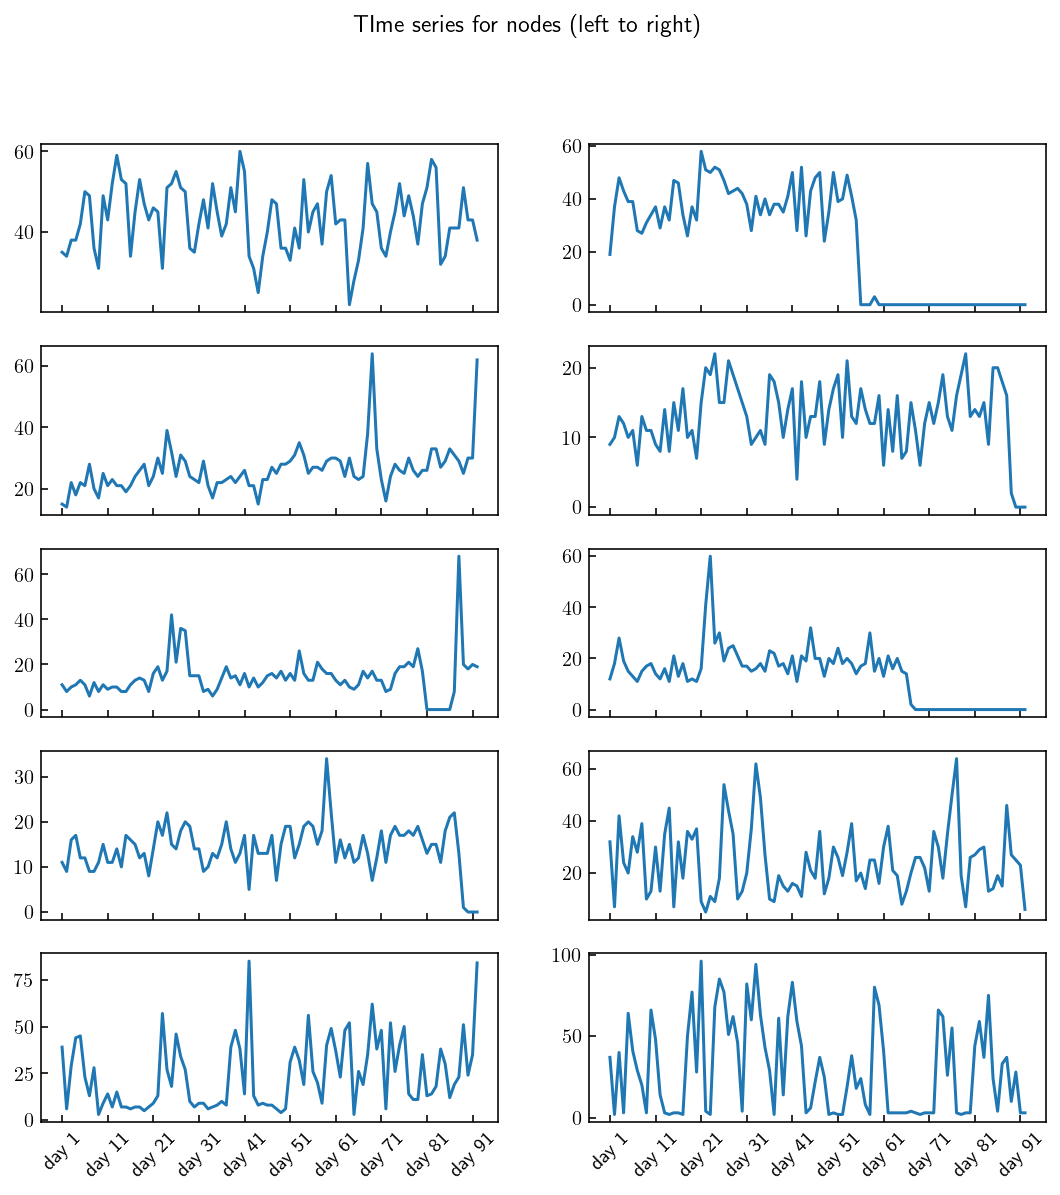

In [11]:
x =df_days['day']
y0 = df_days[0]
y1 = df_days[1]
y2 = df_days[2]
y3 = df_days[3]
y4 = df_days[4]
y5 = df_days[5]
y6 = df_days[6]
y7 = df_days[7]
y8 = df_days[8]
y9 = df_days[9]
ymean=df_days['mean']


fig, ax = plt.subplots(5,2,figsize=(9,9),sharex=True)


ax[0,0].plot(x,y0)
ax[0,1].plot(x,y1)
ax[1,0].plot(x,y2)
ax[1,1].plot(x,y3)
ax[2,0].plot(x,y4)
ax[2,1].plot(x,y5)
ax[3,0].plot(x,y6)
ax[3,1].plot(x,y7)
ax[4,0].plot(x,y8)
ax[4,1].plot(x,y9)
#ax[5,0].plot(x,ymean,linewidth=2.5,label='aggregate')
for axx in ax.flat:
    axx.set_xticks(x[::10])
    axx.set_xticklabels(x[::10], rotation=45)
fig.suptitle("TIme series for nodes (left to right)")

### Correlations

Text(37.64432328961706, 0.5, 'Daily network')

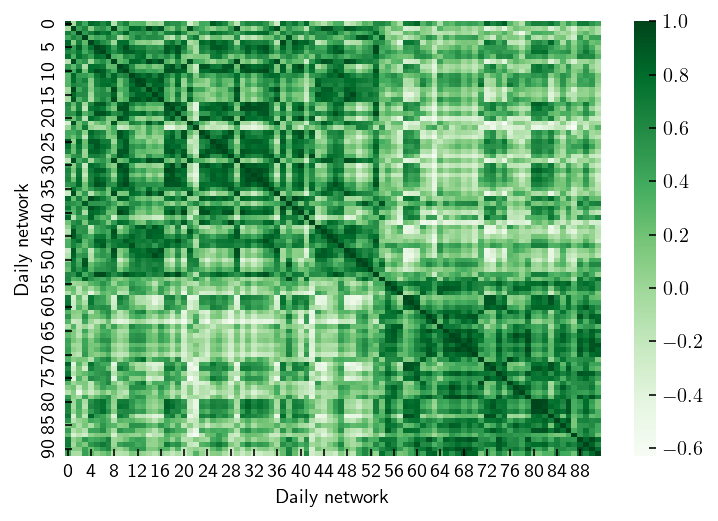

In [12]:
sns.heatmap(df_days[[0,1,2,3,4,5,6,7,8,9]].transpose().corr(),cmap="Greens")
plt.xlabel('Daily network')
plt.ylabel('Daily network')

In [13]:
corr_flat=df_days[[0,1,2,3,4,5,6,7,8,9]].transpose().corr().to_numpy().flatten()
np.mean(corr_flat)

0.3426138783239174

In [14]:
np.var(corr_flat)

0.12780453739716077

In [15]:
agg=[]
da=[]
for i in range(2,92):
    da.append(i)
    av=df_days.iloc[0:i][[0,1,2,3,4,5,6,7,8,9]].transpose().corr().to_numpy().flatten().mean()
    agg.append(av)

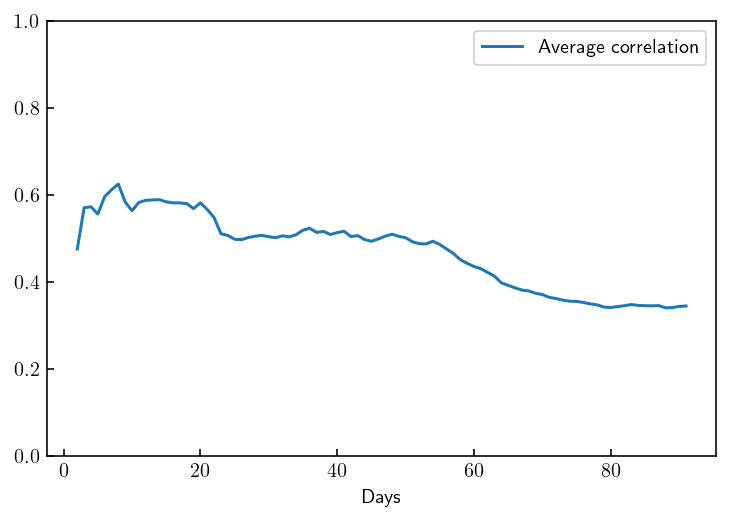

In [16]:
m=np.empty(len(da))
m.fill(0.3426138783239174)
plt.plot(da,agg,label='Average correlation')
plt.xlabel('Days')
plt.ylim(0,1)
plt.legend()

### cCDF

In [22]:
def ccdf(dt):
    count, bins_count = np.histogram(dt, bins=20)
    pdf = count / sum(count)
    cdf = 1-np.cumsum(pdf)
    return [bins_count[1:][:-1],cdf[:-1]]

Text(0.5, 0.98, 'Cummulative distribution for nodes (left to right)')

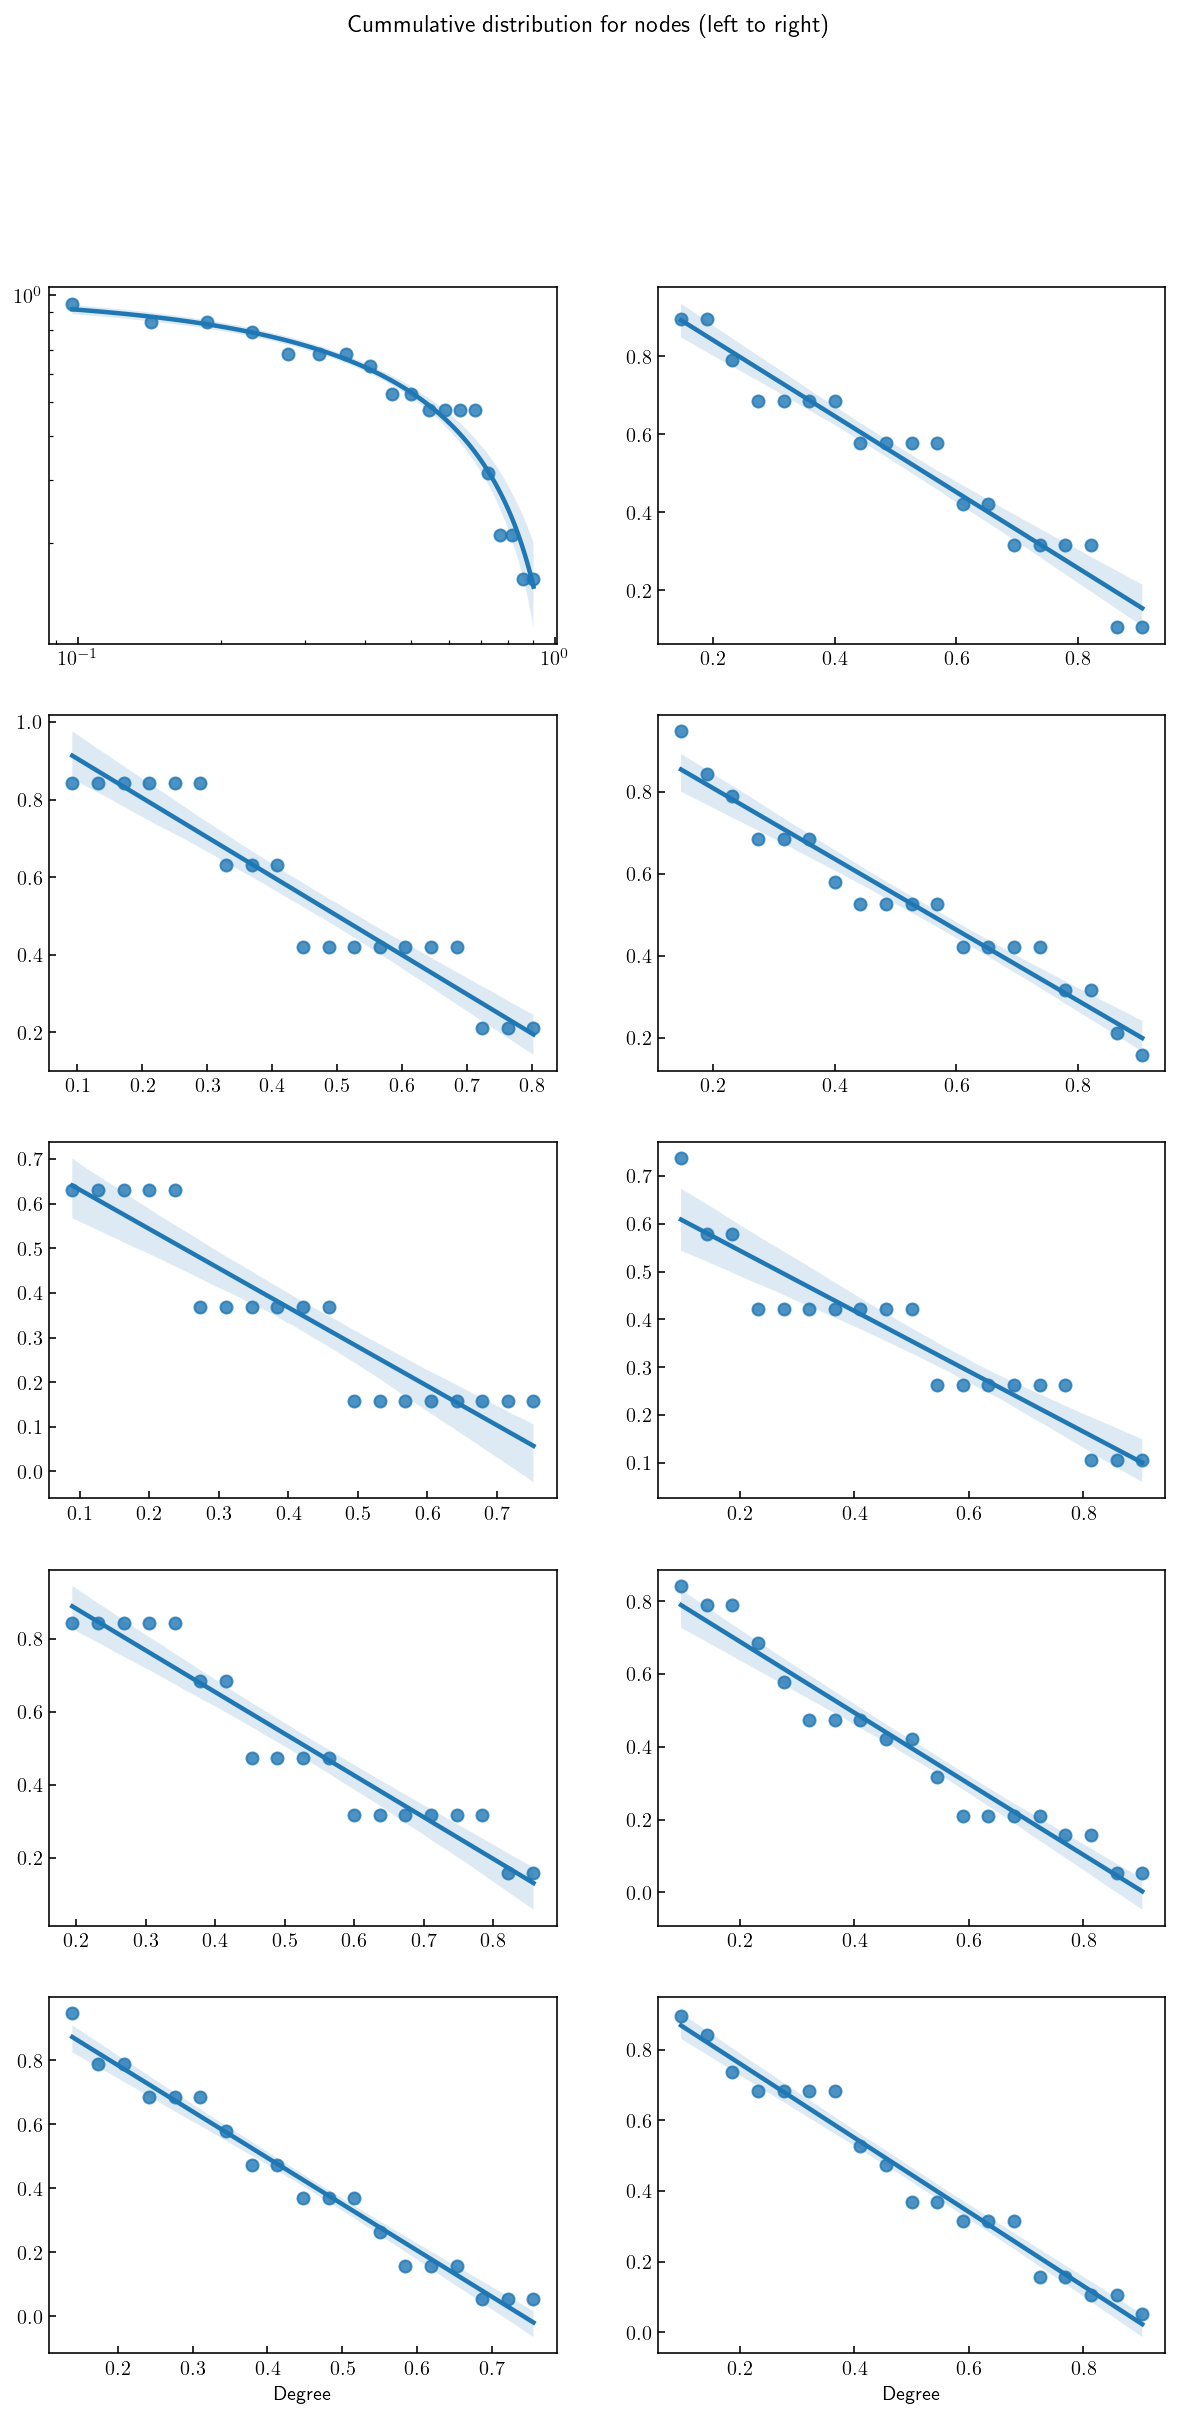

In [23]:
x0 =ccdf(y0)[0]
x1 =ccdf(y1)[0]
x2 =ccdf(y2)[0]
x3 =ccdf(y3)[0]
x4 =ccdf(y4)[0]
x5 =ccdf(y5)[0]
x6 =ccdf(y6)[0]
x7 =ccdf(y7)[0]
x8 =ccdf(y8)[0]
x9 =ccdf(y9)[0]

y0 =ccdf(y0)[1]
y1 =ccdf(y1)[1]
y2 =ccdf(y2)[1]
y3 =ccdf(y3)[1]
y4 =ccdf(y4)[1]
y5 =ccdf(y5)[1]
y6 =ccdf(y6)[1]
y7 =ccdf(y7)[1]
y8 =ccdf(y8)[1]
y9 =ccdf(y9)[1]

fig, ax = plt.subplots(5,2,figsize=(10,19))
ax[0,0].set(xscale="log", yscale="log")

sns.regplot(x=x0,y=y0,ax=ax[0,0])
sns.regplot(x=x1,y=y1,ax=ax[0,1])
sns.regplot(x=x2,y=y2,ax=ax[1,0])
sns.regplot(x=x3,y=y3,ax=ax[1,1])
sns.regplot(x=x4,y=y4,ax=ax[2,0])
sns.regplot(x=x5,y=y5,ax=ax[2,1])
sns.regplot(x=x6,y=y6,ax=ax[3,0])
sns.regplot(x=x7,y=y7,ax=ax[3,1])
sns.regplot(x=x8,y=y8,ax=ax[4,0])
sns.regplot(x=x9,y=y9,ax=ax[4,1])
ax[4,0].set_xlabel('Degree')
ax[4,1].set_xlabel('Degree')
fig.suptitle("Cummulative distribution for nodes (left to right)")


***